In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['font.size'] = 14

## Data

In [3]:
seed = 1
N = 200
K = 5
r_high = 5
rmin,rmax = -r_high, r_high

In [4]:
from kerasy.utils import generateWholeCakes

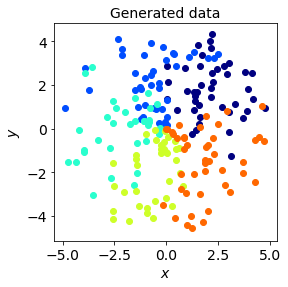

In [5]:
train_x, train_y = generateWholeCakes(K, N, r_high=r_high, seed=seed, same=False, plot=True, figsize=(4,4), noise_scale=2)

## Decision Tree

In [6]:
from kerasy.ML.tree import DecisionTreeClassifier

In [7]:
X,Y = np.meshgrid(np.linspace(rmin,rmax,100), np.linspace(rmin,rmax,100))
XY = np.c_[X.ravel(),Y.ravel()]

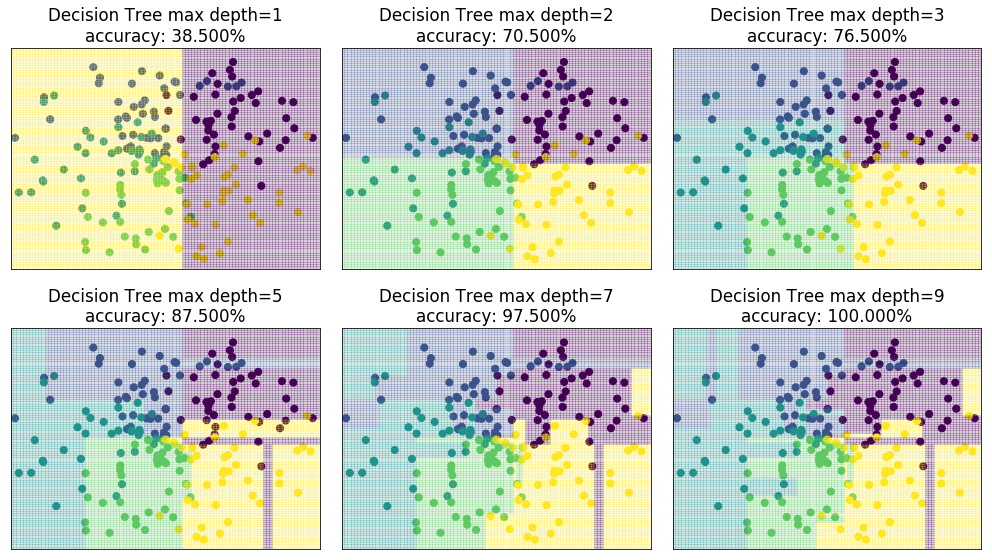

In [8]:
fig = plt.figure(figsize=(14,8))
depths = [1,2,3,5,7,9]
accuracies = []
for i, depth in enumerate(depths):
    ax = fig.add_subplot(2,3,i+1)
    # Change the depth to fit the data.
    model = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=seed)
    model.fit(train_x, train_y)
    predictions = model.predict(train_x)
    accuracy = np.mean(predictions==train_y)
    accuracies.append(accuracy)
    Z = model.predict(XY).reshape(X.shape)
    ax.scatter(train_x[:,0], train_x[:,1], c=train_y, s=50)
    ax.pcolor(X,Y,Z,alpha=0.2)
    ax.set_title(f"Decision Tree max depth={model.max_depth}\naccuracy: {100*accuracy:.3f}%"), ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
    ax.set_xticks([]), ax.set_yticks([])
plt.tight_layout()
plt.show()

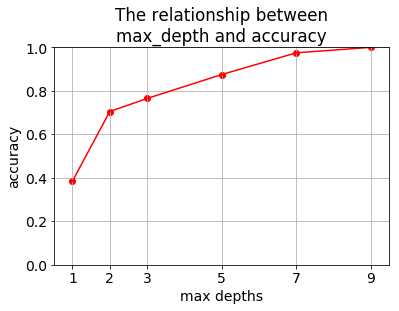

In [9]:
plt.plot(depths, accuracies, color="red")
plt.scatter(depths, accuracies, color="red")
plt.title("The relationship between\nmax_depth and accuracy"), plt.grid() 
plt.xlabel("max depths"), plt.xticks(depths), 
plt.ylabel("accuracy"), plt.ylim(0,1)
plt.show()

In [10]:
best_depth = 5
model = DecisionTreeClassifier(criterion="gini", max_depth=best_depth, random_state=seed)
model.fit(train_x, train_y)

#### `graphviz`

In [11]:
fn = f"decision_tree_max_depth{best_depth}.png"

In [12]:
model.export_graphviz(fn)

True

In [13]:
print(f"![decision_tree_graphvis]({fn})")

![decision_tree_graphvis](decision_tree_max_depth5.png)


![decision_tree_graphvis](decision_tree_max_depth5.png)